In [9]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
# For Performing Dickey-Foller test
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [10]:
week_in_year=52
necessary_columns = ['Date', 'Weekly_Sales']

In [11]:
weekly_sales_data = pd.read_csv("Data_set/sales data-set.csv")
# CONVERTING Date Column to Date time
weekly_sales_data['Date'] = pd.to_datetime(weekly_sales_data['Date'])
weekly_sales_data['Date'] = weekly_sales_data['Date'].dt.date

Dickey Foller Test Stats:
Test-Statistic                -1.042523e+01
p-value                        1.664404e-18
#Lags Used                     0.000000e+00
Number of Observations Used    1.420000e+02
dtype: float64


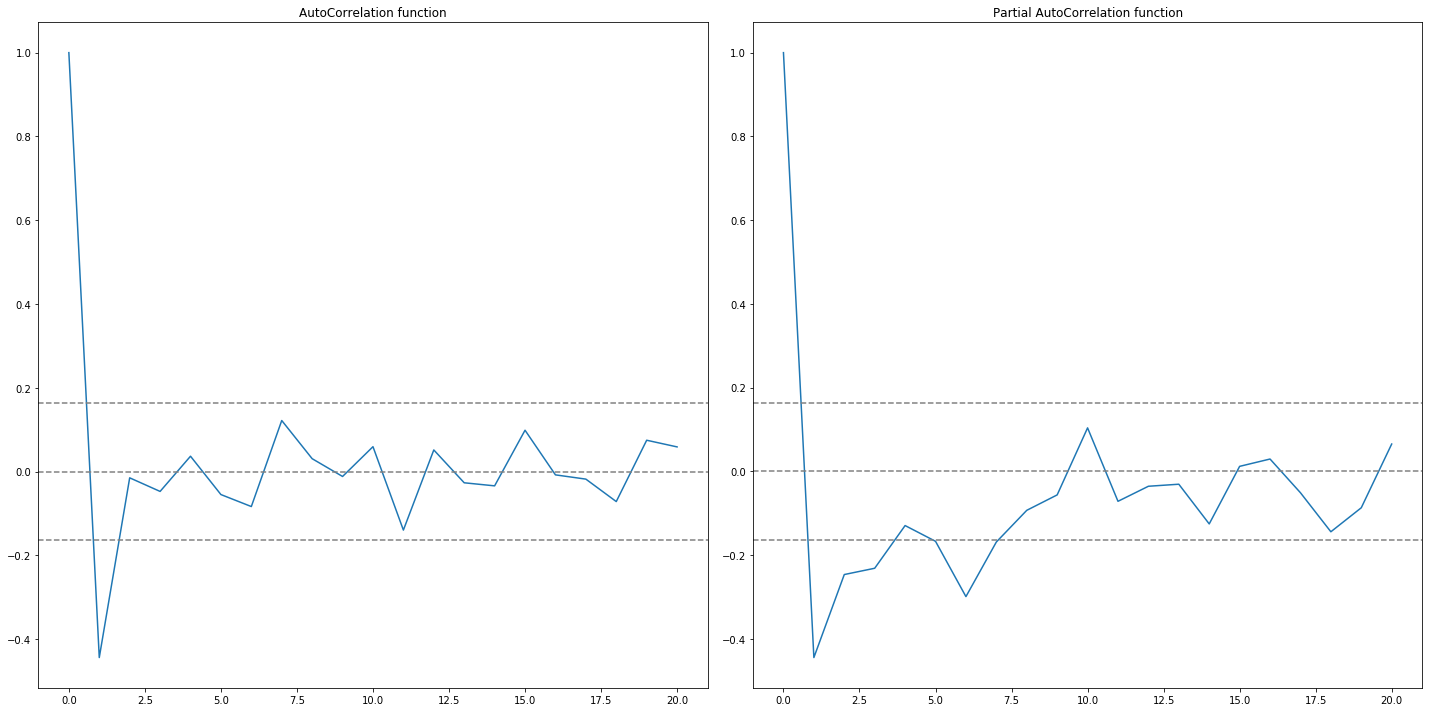

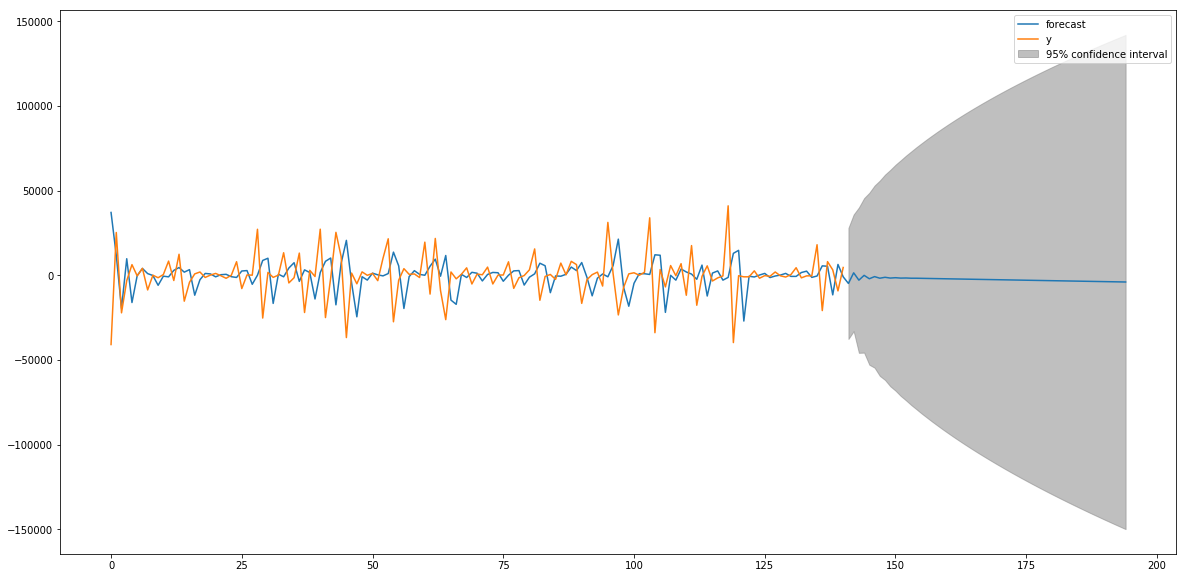

In [12]:
# REMOVE BOTH BREAKS FOR DIFFERENT STORES PREDICTION
# GROUPING STORE WISE
for name, group in weekly_sales_data.groupby(['Store']):
    # STORE WISE PLOT
    sub_fig, sub_ax = plt.subplots()
    sub_ax.set_title("Axis {} title".format(name))
    sub_ax.set_xlabel("X-label for axis {}".format(name))
    # GROUPING DEPT WISE
    for sub_name, sub_group in group.groupby(['Dept']):
        # SUBSETTING AND INDEXING
        sub_group = sub_group[necessary_columns]
        sorted_group = sub_group.sort_values(by=['Date'])
        indexed_weekly_sales_data = sorted_group.set_index(['Date'])
        
        # Performing Dickey Fuller Test
        grp_test = adfuller(indexed_weekly_sales_data['Weekly_Sales'],
                           autolag='AIC')
        gcolumns = ['Test-Statistic', 'p-value', '#Lags Used',
                  'Number of Observations Used']
        grp_output = pd.Series(grp_test[0:4], index=gcolumns)
        print("Dickey Foller Test Stats:")
        print(grp_output)
        # 
        # Shifting the dataset
        shifted_dataset = indexed_weekly_sales_data - indexed_weekly_sales_data.shift()
        shifted_dataset.dropna(inplace=True)

        lag_acf = acf(shifted_dataset, nlags=20)
        lag_pacf = pacf(shifted_dataset, nlags=20, method='ols')
        
        # PLOT FOR ACF, PACF
        plt.subplot(121)
        plt.plot(lag_acf)
        plt.axhline(y=0, linestyle='--', color='gray')
        plt.axhline(y=-1.96/np.sqrt(len(shifted_dataset)),linestyle='--', color='gray')
        plt.axhline(y=1.96/np.sqrt(len(shifted_dataset)),linestyle='--', color='gray')
        plt.title('AutoCorrelation function')
        plt.subplot(122)
        plt.plot(lag_pacf)
        plt.axhline(y=0, linestyle='--', color='gray')
        plt.axhline(y=-1.96/np.sqrt(len(shifted_dataset)),linestyle='--', color='gray')
        plt.axhline(y=1.96/np.sqrt(len(shifted_dataset)),linestyle='--', color='gray')
        plt.title('Partial AutoCorrelation function')
        plt.tight_layout()
        # PLOT ENDS HERE
        
        weekly_sales_shifted_matrix = shifted_dataset.as_matrix()
        model = ARIMA(weekly_sales_shifted_matrix, order=(1,1,0))
        
        model_fit = model.fit()
        predictions=model_fit.predict(1, len(sub_group)+week_in_year, typ='levels')
        model_fit.plot_predict(1, 195)
        break
    break

In [29]:
len(sub_group)

143

len(weekly_sales_shifted_matrix)

In [32]:
len(weekly_sales_shifted_matrix)

142